# SVR

## Import librairies

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import category_encoders as ce
%matplotlib inline

from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

import os

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 238)

## Data importations

In [3]:
# Delphine 
#df = pd.read_csv(r"/Users/delphinepaquiry/Downloads/Etude technique/Data.csv")

# Nathan 
df = pd.read_csv(r"C:\Users\Nathan\Desktop\Etude technique\Data.csv")

### Exploratory data analysis

In [4]:
# view dimensions of dataset
df.shape

(366, 112)

In [5]:
# preview the dataset
df.head()

,Age,Dateexam,DDN,PoidsT1,PoidsSD,TailleT1,TailleSD,IMC1,Poidsleplusbas,DSPoidsleplusbas,IMCpoidsleplusbas,Agepoidsleplusbas,datePoidsleplusbas,Poidsleplushaut,DSPoidsleplushaut,IMCpoidsleplushaut,Agepoidsleplushaut,datePoidsleplushaut,Poids6mois,DatedebutTCA,AgedebutTCA,DuréeTCA,AnorexiedetypeboulemieActuel,vomissementActuel(Nbrparjour),utilisationActuellaxatif,utilisationActuelDiurétique,AnorexiedetyperestrictifActuel,AnorexiedetypeboulemiePasse,vomissementPasse(nbrparjour),utilisationPasselaxatif,AnorexiedetyperestrictifPasse,nombreFracture,FracturedefaibleeNRJ1,cigarettes(nbrjour),alcool(nbverredjour),Drogues,Agedelamenarche,amenorheprimaire,traitementcontraceptif,Cyclesréguliers,Duréemoisdepuisdernièresmenstruations,Signehyperandrogenie,NbrGrossesse,NbrEnfant,Hyperactivite,ActivitePhysiqueActuelPratriquee1 h/s,ActivitePhysiqueActuelPratriquee1NbrHparsemaine,ActivitePhysiquePassePratriquee1,ActivitePhysiquePassePratriquee1NbrHsemaine,Calorimétrie (calories/24h),pcCalorimétrienorme,QR,VO2(ml/min),VCO2(ml/min),Lip(%),Glu(%),Pro(%),AzUr(g/j),MGrassekg,MMaigrekg,MMusculairekg,Depenseenergetiquedefond,Tour de taille,Tour de hanche,rapport taille/hanche,L1L4ZscoreSD,GrasBrasG,GrasBrasD,Gras2Bras,GrasbrasGpc,GrasbrasDpc,Gras2Braspc,MaigreBrasG,MaigreBrasD,Maigre2Bras,GrasTronc,GrasTroncpc,MaigreTroncT1,GrasJambeG,GrasJambeD,Gras2Jambes,GrasJambeGpc,GrasJambeDpc,Gras2jambesT1pc,MaigreJambeG,MaigreJambeD,Maigre2Jambes,GrasSoustotal,GrasSoustotalpc,MaigreSoustotal,GrasTete,GrasTetepc,MaigreTete,GrasTotal,GrasTotalpc,MaigreTotal,iPTHT1 (pg/ml),25OHT1 (ng/ml),OCT(roche),CTXplasmT1(roche),PINP,TSH(mIU/l),Insuline,hemoglobine g/dl,hematocrite %,Globule rouge 10^12/l,VGM fl,coeff d'anisocytose %,plaquette 10^9/l,volume plaquettaire moy fl,cellules nuclées 10^9/l,Glucose (mmol/l)
0,16.586301,2008-11-28,1992-05-02,28.9,-4.0,168.0,1.0,10.23,26.0,-4.2,9.21,16.500000,2008-10-14,48.0,-0.5,17.01,15.5,2007-10-14,38.0,2007-10-14,15.460274,1.126027,0,0.0,0.0,0.0,1,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,16.586301,0.0,0.0,0.0,9.066667,0.0,0.0,0.0,0.0,0,0.0,0,0.0,900.0,-23.0,0.91,131.0,120.0,4.03,55.678794,39.966555,16.0,8.30,34.60,17.60,1179.0,53.0,68.0,0.78,-2.5,111.1,126.9,119.00,8.3,9.4,8.85,1139.3,1122.1,1130.70,735.5,5.4,12585.3,314.1,258.7,286.40,6.8,5.9,6.35,3976.0,3813.0,3894.50,1546.3,6.1,22635.8,698.8,19.8,2418.5,2245.1,7.8,25054.3,73.93,16.11,33.32,0.753,172.00,2.070,6.290,12.0,35.8,3.72,96.0,11.8,130.0,8.8,6.3,4.3
1,19.989041,2008-11-28,1988-12-07,37.4,-2.5,164.0,0.1,13.91,37.0,-2.5,13.76,19.800000,2008-10-08,50.0,-0.5,18.59,17.1,2006-01-01,49.0,2008-07-01,19.578082,0.410959,0,0.0,0.0,0.0,1,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,12.500000,0.0,1.0,0.0,2.700000,0.0,0.0,0.0,0.0,0,0.0,0,2.0,830.0,-32.0,0.64,128.0,83.0,79.40,0.000000,20.596894,8.0,2.53,34.87,22.51,1232.0,59.0,74.0,0.80,0.0,339.5,232.0,285.75,17.0,11.3,14.15,1524.4,1683.9,1604.15,1437.9,8.5,14848.9,1056.2,1315.5,1185.85,16.6,20.5,18.55,4923.5,4726.7,4825.10,4381.1,13.0,27707.4,725.4,19.4,2510.6,5106.4,13.6,30218.0,65.21,36.51,14.51,0.342,45.21,1.950,11.210,11.9,36.2,3.66,99.0,14.3,272.0,7.8,2.5,3.2
2,18.076712,2008-06-04,1990-05-12,41.8,-2.0,170.5,1.4,14.39,35.4,-3.0,12.18,18.076712,2008-07-08,54.0,0.0,18.58,17.1,2007-06-01,37.5,2007-10-01,17.400000,0.676712,0,0.0,0.0,0.0,1,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,14.000000,0.0,0.0,0.0,11.300000,0.0,0.0,0.0,1.0,1,2.0,1,2.0,930.0,-27.0,0.70,141.0,98.0,77.82,4.314381,18.175687,7.0,1.31,39.09,26.02,1321.0,60.0,76.0,0.79,-1.4,146.3,151.4,148.85,7.2,6.9,7.05,1760.2,1922.0,1841.10,940.4,4.6,19031.1,392.2,355.2,373.70,6.0,5.2,5.60,5846.2,6103.0,5974.60,1985.6,5.2,34662.4,744.9,19.7,2571.8,2730.4,6.5,37234.2,86.73,45.02,13.72,0.533,33.27,2.410,6.860,15.0,46.0,4.67,98.0,14.0,177.0,8.1,6.9,3.2
3,16.495890,2009-01-07,1992-07-14,38.5,-2.2,152.0,-1.8,16.68,36.0,-1.0,15.58,13.500000,2006-01-01,40.0,-1.5,17.31,14.5,2007-01-01,36.5,2008-07-12,16.005479,0.490411,0,0.0,0.0,0.0,1,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,12.000000,0.0,0.0,1.0,0.066667,0.0,0.0,0.0,1.0,1,

### Check filling the columns

In [6]:
df.isnull().sum()

Age                                                0
Dateexam                                           0
DDN                                                0
PoidsT1                                            0
PoidsSD                                            0
TailleT1                                           0
TailleSD                                           0
IMC1                                               0
Poidsleplusbas                                     0
DSPoidsleplusbas                                   0
IMCpoidsleplusbas                                  0
Agepoidsleplusbas                                  0
datePoidsleplusbas                                 0
Poidsleplushaut                                    0
DSPoidsleplushaut                                  0
IMCpoidsleplushaut                                 0
Agepoidsleplushaut                                 0
datePoidsleplushaut                                0
Poids6mois                                    

### Create Column with date

In [7]:
colonnes_date =[
    'Dateexam',
    'DDN',
    'datePoidsleplusbas',
    'datePoidsleplushaut',
    'DatedebutTCA'
]

#### Convertir les colonnes Dates

In [8]:
df['Dateexam'] = pd.to_datetime(df['Dateexam'])
df['datePoidsleplusbas'] = pd.to_datetime(df['datePoidsleplusbas'])
df['datePoidsleplushaut'] = pd.to_datetime(df['datePoidsleplushaut'])
df['DatedebutTCA'] = pd.to_datetime(df['DatedebutTCA'])

#### Calculer les différences

In [9]:
df['MoisPoidsBasExam'] = (df['Dateexam'].dt.year - df['datePoidsleplusbas'].dt.year) * 12 + (df['Dateexam'].dt.month - df['datePoidsleplusbas'].dt.month)

df['MoisPoidsHautExam'] = (df['Dateexam'].dt.year - df['datePoidsleplushaut'].dt.year) * 12 + (df['Dateexam'].dt.month - df['datePoidsleplushaut'].dt.month)

#### Afficher les nouvelles colonnes

In [10]:
df = df.drop(columns=colonnes_date)

In [11]:
df

,Age,PoidsT1,PoidsSD,TailleT1,TailleSD,IMC1,Poidsleplusbas,DSPoidsleplusbas,IMCpoidsleplusbas,Agepoidsleplusbas,Poidsleplushaut,DSPoidsleplushaut,IMCpoidsleplushaut,Agepoidsleplushaut,Poids6mois,AgedebutTCA,DuréeTCA,AnorexiedetypeboulemieActuel,vomissementActuel(Nbrparjour),utilisationActuellaxatif,utilisationActuelDiurétique,AnorexiedetyperestrictifActuel,AnorexiedetypeboulemiePasse,vomissementPasse(nbrparjour),utilisationPasselaxatif,AnorexiedetyperestrictifPasse,nombreFracture,FracturedefaibleeNRJ1,cigarettes(nbrjour),alcool(nbverredjour),Drogues,Agedelamenarche,amenorheprimaire,traitementcontraceptif,Cyclesréguliers,Duréemoisdepuisdernièresmenstruations,Signehyperandrogenie,NbrGrossesse,NbrEnfant,Hyperactivite,ActivitePhysiqueActuelPratriquee1 h/s,ActivitePhysiqueActuelPratriquee1NbrHparsemaine,ActivitePhysiquePassePratriquee1,ActivitePhysiquePassePratriquee1NbrHsemaine,Calorimétrie (calories/24h),pcCalorimétrienorme,QR,VO2(ml/min),VCO2(ml/min),Lip(%),Glu(%),Pro(%),AzUr(g/j),MGrassekg,MMaigrekg,MMusculairekg,Depenseenergetiquedefond,Tour de taille,Tour de hanche,rapport taille/hanche,L1L4ZscoreSD,GrasBrasG,GrasBrasD,Gras2Bras,GrasbrasGpc,GrasbrasDpc,Gras2Braspc,MaigreBrasG,MaigreBrasD,Maigre2Bras,GrasTronc,GrasTroncpc,MaigreTroncT1,GrasJambeG,GrasJambeD,Gras2Jambes,GrasJambeGpc,GrasJambeDpc,Gras2jambesT1pc,MaigreJambeG,MaigreJambeD,Maigre2Jambes,GrasSoustotal,GrasSoustotalpc,MaigreSoustotal,GrasTete,GrasTetepc,MaigreTete,GrasTotal,GrasTotalpc,MaigreTotal,iPTHT1 (pg/ml),25OHT1 (ng/ml),OCT(roche),CTXplasmT1(roche),PINP,TSH(mIU/l),Insuline,hemoglobine g/dl,hematocrite %,Globule rouge 10^12/l,VGM fl,coeff d'anisocytose %,plaquette 10^9/l,volume plaquettaire moy fl,cellules nuclées 10^9/l,Glucose (mmol/l),MoisPoidsBasExam,MoisPoidsHautExam
0,16.586301,28.90,-4.0,168.0,1.0,10.23,26.00,-4.20,9.21,16.500000,48.00,-0.50,17.01,15.5,38.00,15.460274,1.126027,0,0.0,0.0,0.0,1,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,16.586301,0.0,0.0,0.0,9.066667,0.0,0.0,0.0,0.0,0,0.00,0,0.00,900.0,-23.0,0.91,131.00,120.0,4.03,55.678794,39.966555,16.00,8.30,34.60,17.60,1179.0,53.0,68.0,0.780000,-2.50,111.10,126.90,119.000,8.30,9.4,8.85,1139.30,1122.10,1130.700,735.50,5.4,12585.30,314.10,258.70,286.40,6.8,5.90,6.350,3976.0,3813.00,3894.50,1546.3,6.1,22635.8,698.80,19.8,2418.5,2245.1,7.80,25054.30,73.93,16.11,33.32,0.753,172.00,2.070,6.290,12.0,35.8,3.720,96.0,11.80,130.0,8.8,6.30,4.3,1,13
1,19.989041,37.40,-2.5,164.0,0.1,13.91,37.00,-2.50,13.76,19.800000,50.00,-0.50,18.59,17.1,49.00,19.578082,0.410959,0,0.0,0.0,0.0,1,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,12.500000,0.0,1.0,0.0,2.700000,0.0,0.0,0.0,0.0,0,0.00,0,2.00,830.0,-32.0,0.64,128.00,83.0,79.40,0.000000,20.596894,8.00,2.53,34.87,22.51,1232.0,59.0,74.0,0.800000,0.00,339.50,232.00,285.750,17.00,11.3,14.15,1524.40,1683.90,1604.150,1437.90,8.5,14848.90,1056.20,1315.50,1185.85,16.6,20.50,18.550,4923.5,4726.70,4825.10,4381.1,13.0,27707.4,725.40,19.4,2510.6,5106.4,13.60,30218.00,65.21,36.51,14.51,0.342,45.21,1.950,11.210,11.9,36.2,3.660,99.0,14.30,272.0,7.8,2.50,3.2,1,34
2,18.076712,41.80,-2.0,170.5,1.4,14.39,35.40,-3.00,12.18,18.076712,54.00,0.00,18.58,17.1,37.50,17.400000,0.676712,0,0.0,0.0,0.0,1,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,14.000000,0.0,0.0,0.0,11.300000,0.0,0.0,0.0,1.0,1,2.00,1,2.00,930.0,-27.0,0.70,141.00,98.0,77.82,4.314381,18.175687,7.00,1.31,39.09,26.02,1321.0,60.0,76.0,0.790000,-1.40,146.30,151.40,148.850,7.20,6.9,7.05,1760.20,1922.00,1841.100,940.40,4.6,19031.10,392.20,355.20,373.70,6.0,5.20,5.600,5846.2,6103.00,5974.60,1985.6,5.2,34662.4,744.90,19.7,2571.8,2730.4,6.50,37234.20,86.73,45.02,13.72,0.533,33.27,2.410,6.860,15.0,46.0,4.670,98.0,14.00,177.0,8.1,6.90,3.2,-1,12
3,16.495890,38.50,-2.2,152.0,-1.8,16.68,36.00,-1.00,15.58,13.500000,40.00,-1.50,17.31,14.5,36.50,16.005479,0.490411,0,0.0,0.0,0.0,1,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,12.000000,0.0,0.0,1.0,0.066667,0.0,0.0,0.0,1.0,1,20.00,0,0.00,1230.0,0.0,0.89,176.00,156.0,24.70,57.600000,17.600000,8.00,3.80,34.20,22.98,1218.0,64.0,77.0,0.830000,-0.20,2

#### Keep only good features

In [12]:
features_no_null = ['Poidsleplusbas', 'Poids6mois', 'OCT(roche)', 'nombreFracture', 'rapport taille/hanche', 'Duréemoisdepuisdernièresmenstruations', 'Insuline', 'IMCpoidsleplusbas', 'Glucose (mmol/l)', 'Age', 'Globule rouge 10^12/l', 'Tour de hanche', 'Drogues', 'volume plaquettaire moy fl', 'PINP']

binary_columns= [
    "AnorexiedetypeboulemieActuel",
    "utilisationActuellaxatif",
    "utilisationActuelDiurétique",
    "AnorexiedetyperestrictifActuel",
    "AnorexiedetypeboulemiePasse",
    "utilisationPasselaxatif",
    "AnorexiedetyperestrictifPasse",
    "amenorheprimaire",
    "traitementcontraceptif",
    "Cyclesréguliers",
    "Signehyperandrogenie", 
    "Hyperactivite",
    "ActivitePhysiqueActuelPratriquee1 h/s",
    "ActivitePhysiquePassePratriquee1"    
]

In [13]:
# Liste des colonnes à conserver
columns_to_keep = features_no_null + binary_columns + ['L1L4ZscoreSD']

# Sélectionner uniquement les colonnes spécifiées dans le dataframe df
df = df.loc[:, columns_to_keep]

### Declare feature vector and target variable

In [14]:
X = df.drop(columns=['L1L4ZscoreSD'])
y = df['L1L4ZscoreSD']

### Normalisation 

In [15]:
# Initialiser le MinMaxScaler
scaler = StandardScaler()

# Normaliser les données
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

### Split data into separate training and test set 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Création d'une instance de SVM avec un noyau linéaire

In [17]:
svr = SVR(kernel='linear')

###  Entraînement du modèle SVM

In [18]:
svr.fit(X_train, y_train)

SVR(kernel='linear')

###  Prédictions sur l'ensemble de test

In [19]:
y_pred = svr.predict(X_test)

### Évaluation des performances du modèle

In [20]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.160047469769344


### Features

In [26]:
# Permuter les caractéristiques et évaluer l'impact sur les performances
for feature in range(X_test.shape[1]):
    X_test_permuted = X_test.copy()
    np.random.shuffle(X_test_permuted[:, feature])  # Permuter les valeurs de la caractéristique
    
    # Prédire avec les caractéristiques permutées
    y_pred_permuted = svr.predict(X_test_permuted)
    mse_permuted = mean_squared_error(y_test, y_pred_permuted)
    
    # Calculer l'importance de la caractéristique
    feature_importance = initial_mse - mse_permuted
    feature_importances.append(feature_importance)


# Afficher l'importance des caractéristiques
for i, importance in enumerate(feature_importances):
    print(f"Feature {i}: {importance}")

# Vous pouvez également trier et visualiser les importances des caractéristiques
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_importances = np.array(feature_importances)[sorted_indices]
print("Importances des caractéristiques triées : ", sorted_importances)

InvalidIndexError: (slice(None, None, None), 0)

### Calculer l'erreur

In [21]:
errors = np.abs(y_test - y_pred)

data = {'errors': errors, 'value_test':y_test, 'predictions':y_pred}
useful = pd.DataFrame(data)

df_sorted = useful.sort_values(by='value_test', ascending=False)

print(df_sorted)

       errors  value_test  predictions
90   2.261660         2.1    -0.161660
354  2.218612         2.1    -0.118612
328  2.868486         1.8    -1.068486
361  2.548205         1.4    -1.148205
15   2.027769         1.2    -0.827769
339  1.477723         1.0    -0.477723
305  0.734036         0.8     0.065964
292  1.815484         0.7    -1.115484
255  2.111254         0.6    -1.511254
280  0.704923         0.3    -0.404923
229  0.990251         0.3    -0.690251
232  1.505342         0.2    -1.305342
261  1.099843         0.2    -0.899843
271  1.538174         0.1    -1.438174
268  1.785111         0.1    -1.685111
165  0.809296         0.1    -0.709296
222  0.003367         0.0    -0.003367
152  1.120437         0.0    -1.120437
147  0.154463        -0.1     0.054463
307  0.291630        -0.2    -0.491630
116  0.983676        -0.2    -1.183676
3    0.820073        -0.2    -1.020073
233  0.936224        -0.3    -1.236224
108  0.393499        -0.3     0.093499
155  0.562242        -0.3

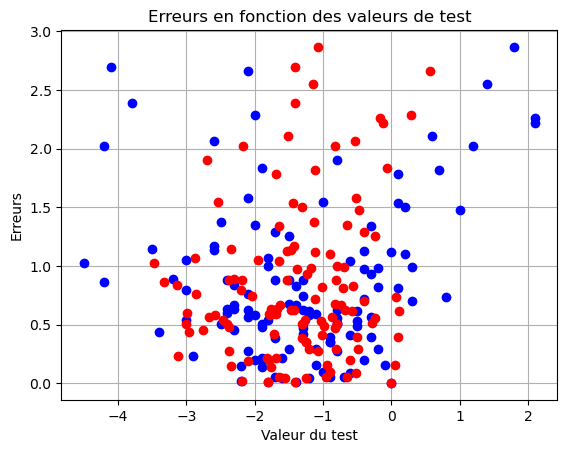

In [22]:
# Tracer la courbe des erreurs en fonction des valeurs de test sans lignes entre les points
plt.plot(useful['value_test'], useful['errors'], marker='o', color='b', linestyle='')
plt.plot(useful['predictions'], useful['errors'], marker='o', color='r', linestyle='')

# Ajouter des étiquettes et des titres
plt.xlabel('Valeur du test')
plt.ylabel('Erreurs')
plt.title('Erreurs en fonction des valeurs de test')

# Afficher la grille
plt.grid(True)

# Afficher le graphique
plt.show()

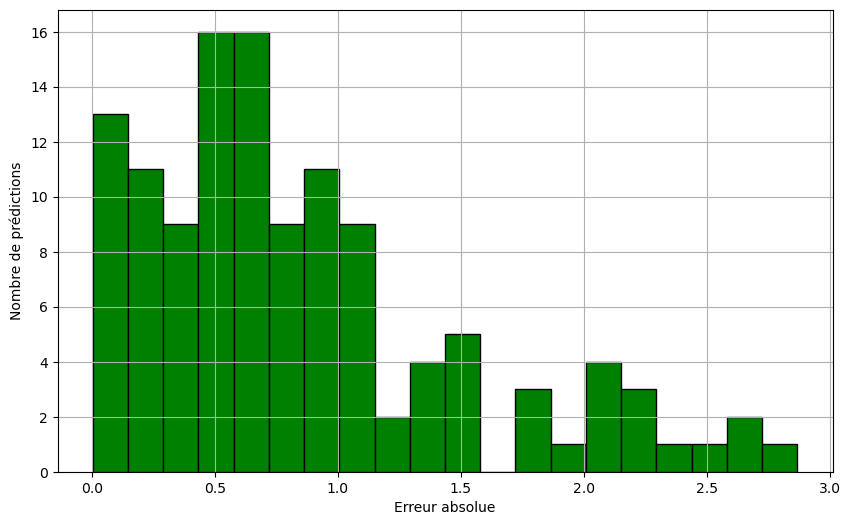

In [23]:
# Tracer l'histogramme des pourcentages d'erreur
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=20, color='green', edgecolor='black')
plt.xlabel('Erreur absolue')
plt.ylabel('Nombre de prédictions')
plt.grid(True)
plt.show()
